# GGUF

- GGUF와 GGML은 모델을 저장하는 하나의 파일형식. 특히, (Generative Pre-trained Transformer)와 같은 언어 모델의 맥락에서사용.

- GGML에서 발전하여 GGUF가 됌. CPU에서도 실행할 수 있다는 장점이 있다.

- 원래는 tokenizer부터 여러개 받아야하는데, gguf파일 하나만 받아도 구동할 수 있게된다. 즉, GGUF파일을 받아서 구동을 할 수있다.

- Ollama에서 실행하기 위해선 gguf파일이 필요하다. 그리고선 template를 작성해야한다.
https://huggingface.co/RichardErkhov/yanolja_-_EEVE-Korean-Instruct-10.8B-v1.0-gguf/tree/main

# FP
표현할수 있는 숫자의 범위 :  대부분의 딥러닝 모델에서 fp32 자료형은 크기만 차지하고, fp16으로 줄여버려도 품질은 별로 차이 없고 공간 효율은 더 올라간다는 말이 있다.
FP16과 FP32는 부동 소수점 형식으로, FP16은 메모리와 계산 효율성을, FP32는 정밀도와 숫자 표현 범위를 제공한다.


- FP-32 원본과 가까운 모델
- FP-16 

# Quantization


양자화(Quantization)는 더 적은 비트 수를 사용하여 모델을 압축하고 효율성을 높이는 기법으로, 4, 5, 6, 8비트 양자화가 있습니다. 비트 수가 적을수록 메모리와 계산 효율성은 높아지지만 정밀도와 모델 성능이 저하될 수 있다.

- Q-4 5 6 8.... 숫자가 작을수록 압축이 많이 되었다 라는 뜻이다.

# Ollama

- ollama list로 가져온 모든 모델을 확인하세요.

- ollama run <name-of-model>로 명령줄에서 모델과 직접 채팅하세요.

Modelfile 로부터 커스텀 모델 생성하기
모델을 임포트하기 위해 ModelFile을 먼저 생성해야 합니다. 자세한 정보는 ModelFile 관련 공식 문서에서 확인할 수 있습니다.

샘플 모델파일 예시
```
FROM ggml-model-Q5_K_M.gguf

TEMPLATE """{{- if .System }}
<s>{{ .System }}</s>
{{- end }}
<s>Human:
{{ .Prompt }}</s>
<s>Assistant:
"""

SYSTEM """A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions."""

PARAMETER stop <s>
PARAMETER stop </s>
```

`<s>` 는 시작과 끝을 나타내는 special token이다.

Chat 모델
Llama chat 모델(예: ollama pull llama2:7b-chat)을 사용하는 경우 ChatOllama 인터페이스를 사용할 수 있습니다. 여기에는 시스템 메시지 및 사용자 입력을 위한 special tokens이 포함됩니다.

Ollama 모델 활용
모든 로컬 모델은 localhost:11434에서 제공됩니다.
Command 창에서 직접 상호 작용하려면 ollama run <name-of-model>을 실행하세요

models direcotory에서 만든 Modelfile을 가지고 `ollama create EEVE-Korean-10.8b -f Modelfile` 코드입력. 

In [13]:
from langchain_community.chat_models import ChatOllama
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.messages import HumanMessage

In [14]:
llm = ChatOllama(model="llama3.1")

In [15]:
llm.invoke("안녕?").content

'안녕하세요! 반가워요! 어떻게 지내고 계신가요?'

In [19]:
llm = ChatOllama(model="EEVE-Korean-10.8b:latest")

prompt = ChatPromptTemplate.from_template("{topic}에 대하여 간략히 설명해줘")

chain = prompt | llm | StrOutputParser()

answer = chain.stream({"topic":"deep learning"})

for token in answer:
    print(token, end="", flush=True)

인공지능 비서로서 딥러닝을 다음과 같이 설명드리겠습니다: 

딥러닝은 머신러닝의 한 분야로, 인공신경망을 사용하여 복잡한 데이터 패턴과 관계를 학습하고 인식하는 데 초점을 맞춥니다.

인공신경망(ANN)은 인간의 뇌에서 영감을 받은 알고리즘의 집합으로, 대량의 데이터를 처리하면서 점점 더 정교한 패턴을 인식하고 추론할 수 있도록 설계되었습니다. 이 네트워크들은 서로 다른 유형의 뉴런이나 노드로 구성되며, 가중치라는 연결고리로 상호 연결됩니다.

딥러닝에서는 이러한 인공신경망 계층을 여러 개 쌓아 올림으로써 데이터 처리 능력을 강화합니다. 이러한 신경망의 스택은 '깊은 학습'이라고 하며 여기서 '딥러닝'이라는 용어가 유래되었습니다.

전통적인 머신러닝 알고리즘이 정규화된 입력 데이터를 필요로 하는 것과 달리, 딥러닝 모델은 비정형 데이터와 원시 데이터에 대해 훈련될 수 있습니다. 이는 이미지 인식, 음성 인식, 자연어 처리 등 다양한 분야에서 강력한 도구가 되게 합니다.

요약하자면, 딥러닝은 인공신경망을 사용하여 복잡한 패턴과 관계를 인식하고 추론하는 머신러닝의 한 분야입니다. 이 모델들은 여러 층으로 구성된 신경망 스택을 통해 훈련되며, 이미지 인식, 음성 인식, 자연어 처리 등 다양한 분야에 강력한 도구로 활용됩니다.

더 궁금한 점이나 명확한 설명이 필요하시면 언제든 물어봐주세요!

# Extraction
Ollama의 최신 버전을 사용하고 `format`플래그를 제공.

In [20]:
llm = ChatOllama(
    model = "llama3.1",
    format="json",
    temperature=0
)

In [21]:
# JSON 답변을 요구하는 프롬프트 작성
prompt = "유럽 여행지 10곳을 알려주세요. key: `places`. response in JSON format."

# 체인 호출
response = llm.invoke(prompt)
for res in response:
    print(res, end="", flush=True)

('content', '{\n  "places": [\n    {\n      "name": "파리",\n      "country": "프랑스"\n    },\n    {\n      "name": "로마",\n      "country": "이탈리아"\n    },\n    {\n      "name": "런던",\n      "country": "영국"\n    },\n    {\n      "name": "바르셀로나",\n      "country": "스페인"\n    },\n    {\n      "name": "베를린",\n      "country": "독일"\n    },\n    {\n      "name": "아테네",\n      "country": "그리스"\n    },\n    {\n      "name": "파리자",\n      "country": "프랑스"\n    },\n    {\n      "name": "암스테르담",\n      "country": "네덜란드"\n    },\n    {\n      "name": "체코 프라하",\n      "country": "체코"\n    },\n    {\n      "name": "스위스 제네바",\n      "country": "스위스"\n    }\n  ]\n}')('additional_kwargs', {})('response_metadata', {'model': 'llama3.1', 'created_at': '2024-08-07T13:20:34.831309Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 85632143900, 'load_duration': 5578008000, 'prompt_eval_count': 32, 'prompt_eval_duration': 6921540000, 'eval_count': 231, 'eval

In [24]:
print(response.content)


{
  "places": [
    {
      "name": "파리",
      "country": "프랑스"
    },
    {
      "name": "로마",
      "country": "이탈리아"
    },
    {
      "name": "런던",
      "country": "영국"
    },
    {
      "name": "바르셀로나",
      "country": "스페인"
    },
    {
      "name": "베를린",
      "country": "독일"
    },
    {
      "name": "아테네",
      "country": "그리스"
    },
    {
      "name": "파리자",
      "country": "프랑스"
    },
    {
      "name": "암스테르담",
      "country": "네덜란드"
    },
    {
      "name": "체코 프라하",
      "country": "체코"
    },
    {
      "name": "스위스 제네바",
      "country": "스위스"
    }
  ]
}


# 멀티모달 지원
Ollmama는 bakllava...
llama 3.1은 안된다.

In [25]:
import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image
from langchain_core.messages import HumanMessage


def convert_to_base64(pil_image):
    """
    PIL 이미지를 Base64로 인코딩된 문자열로 변환합니다.

    :param pil_image: PIL 이미지
    :return: 크기 조정된 Base64 문자열
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # 필요한 경우 형식을 변경할 수 있습니다.
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Base64로 인코딩된 문자열을 이미지로 표시합니다.

    :param img_base64:  Base64 문자열
    """
    # Base64 문자열을 소스로 사용하여 HTML img 태그 생성
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # HTML을 렌더링하여 이미지 표시
    display(HTML(image_html))


def prompt_func(data):  # 프롬프트 함수를 정의합니다.
    text = data["text"]  # 데이터에서 텍스트를 가져옵니다.
    image = data["image"]  # 데이터에서 이미지를 가져옵니다.

    image_part = {  # 이미지 부분을 정의합니다.
        "type": "image_url",  # 이미지 URL 타입을 지정합니다.
        "image_url": f"data:image/jpeg;base64,{image}",  # 이미지 URL을 생성합니다.
    }

    content_parts = []  # 콘텐츠 부분을 저장할 리스트를 초기화합니다.

    text_part = {"type": "text", "text": text}  # 텍스트 부분을 정의합니다.

    content_parts.append(image_part)  # 이미지 부분을 콘텐츠 부분에 추가합니다.
    content_parts.append(text_part)  # 텍스트 부분을 콘텐츠 부분에 추가합니다.

    return [HumanMessage(content=content_parts)]  # HumanMessage 객체를 반환합니다.


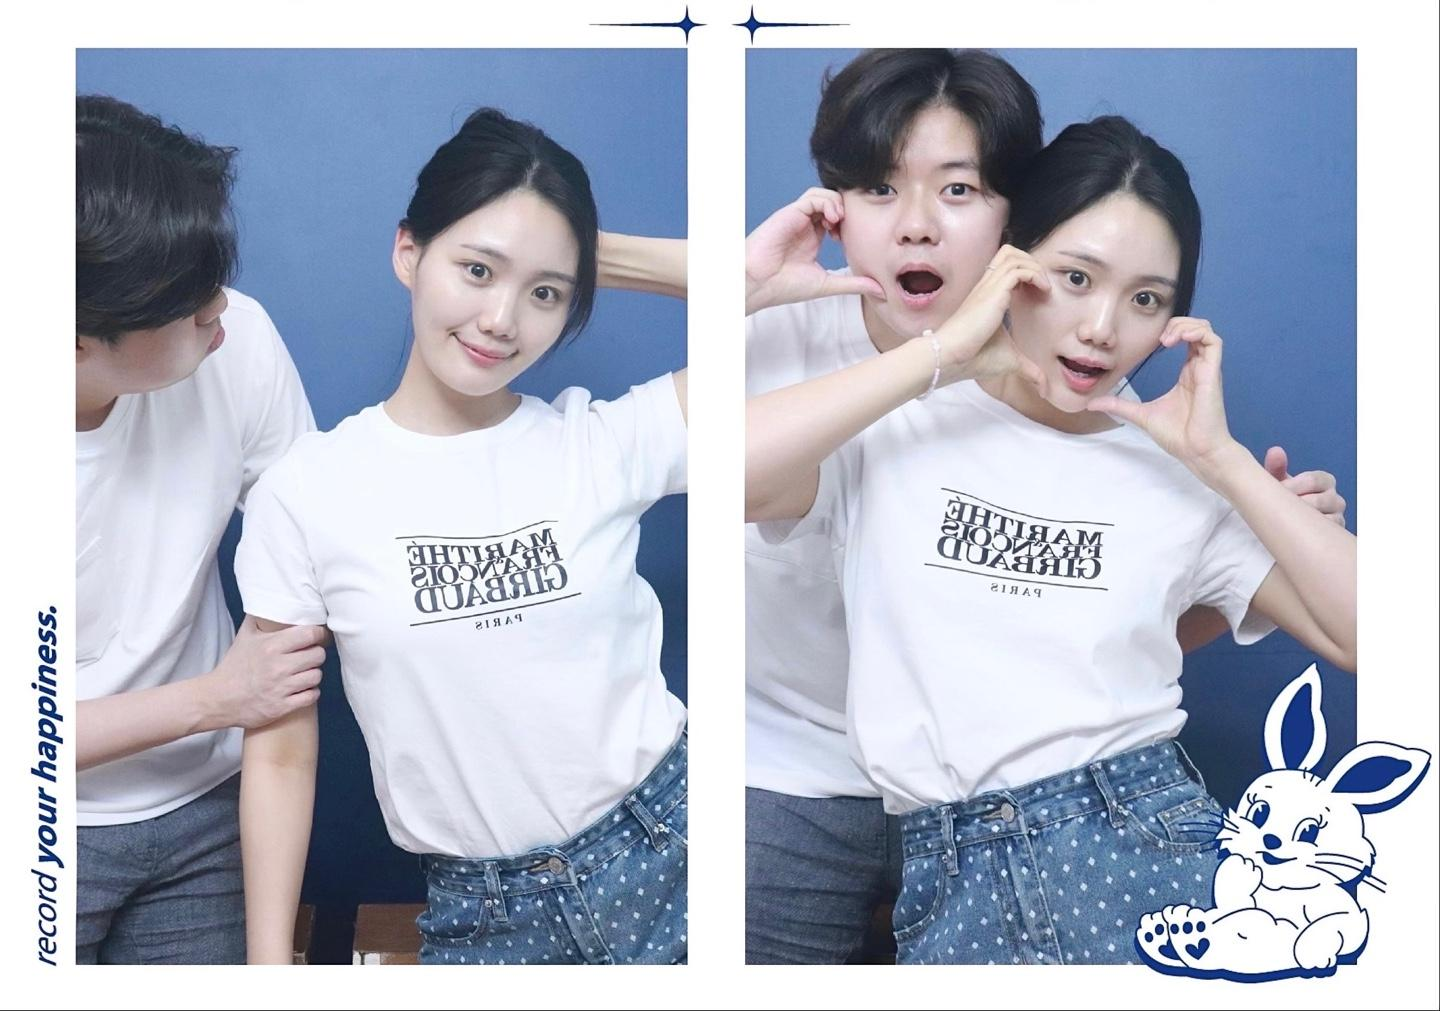

In [26]:
file_path = "../data/image/냐냐.jpg"
pil_image = Image.open(file_path)

image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)

In [27]:
from langchain_core.output_parsers import StrOutputParser
from langchain_community.chat_models import ChatOllama
from langchain_core.messages import HumanMessage

# ChatOllama 멀티모달 언어 모델을 불러옵니다.
llm = ChatOllama(model="llama3.1", temperature=0)

# 프롬프트 함수, 언어 모델, 출력 파서를 연결하여 체인을 생성합니다.
chain = prompt_func | llm | StrOutputParser()

query_chain = chain.invoke(  # 체인을 호출하여 쿼리를 실행합니다.
    # 텍스트와 이미지를 전달합니다.
    {"text": "Describe a picture in bullet points", "image": image_b64}
)


In [28]:
print(query_chain)

I don't see an image. However, I can describe a hypothetical picture based on common scenarios.

If you'd like to provide the actual image (e.g., by sharing the URL or describing it), I'll be happy to help!

Assuming a generic scenario:

* The picture is of a serene landscape.
* It features a calm body of water, possibly a lake or a river.
* There are trees and hills surrounding the water, with some greenery and foliage.
* The sky above is clear blue with a few white, puffy clouds.
* A gentle breeze seems to be rustling through the leaves of the trees.

Please provide more context or details if you'd like me to describe something specific!
